In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
wine = load_wine()

# Create a Pandas dataframe
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Add the target variable to the dataframe
df['target'] = wine.target

# Split the dataset into features and target variables
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
pca = PCA(n_components=2)  # Choose the number of components
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of principal components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

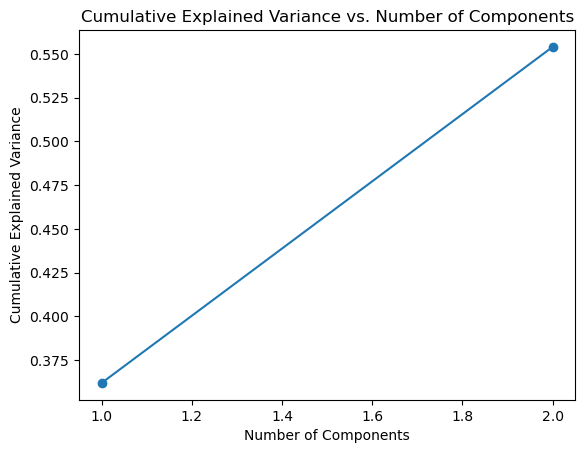

In [5]:
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

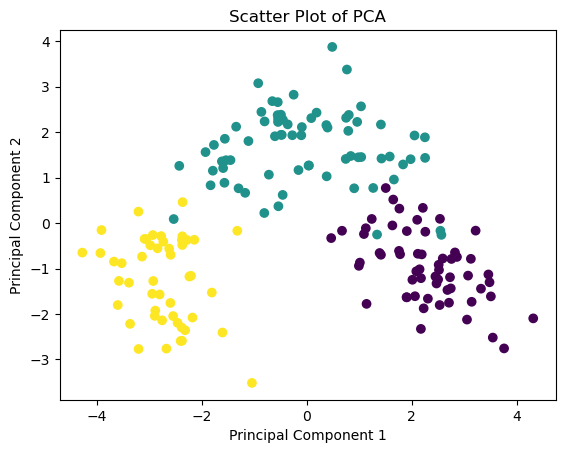

In [6]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA')
plt.show()


In [7]:
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
kmeans.fit(X_pca)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [8]:
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5610505693103248


In [9]:
# Interpret the results of PCA and clustering analysis
# Analyze the scatter plot and the clusters obtained from K-Means
# Assess the separation of different classes and evaluate the performance of the clustering algorithm